In [47]:
import pandas as pd
import koreanize_matplotlib
import matplotlib.pyplot as plt

# 온도변화에 따른 식중독과의 상관관계
- 필요한 자료 : 온도변화와 세균별 식중독 발병건수
- 온도변화와 세균별 식중독 발병건수의 상관관계

발생건수(건), 환자수(명) / 기준: 2024. 6. 30. (~'22년 '확정', '23년 '잠정', '24년 '신고' 통계)

· 확정 : 원인·역학조사 및 환류 평가가 완료되어 확정된 식중독 통계

· 잠정 : 원인·역학조사 등이 완료되지 않아 미확정인 식중독 통계

· 신고 : 식중독 의심 신고 통계로서 실제 식중독 통계 수치와 다름. 확정 통계와 단순 비교 자제


식중동 데이터는 큰 카테고리로 월별 / 연도별 / 지역별 / 원인시설별 / 원인물질별
그리고 소 카테고리로 하나씩 월별+연도별 형식으로 데이터가 존재함.

1. 여름철에 많이 발생하는 세균과 겨울철에 많이 발생하는 세균 분리하기
=> 2017 ~ 2022년까지 원인물질별/월별 데이터 뽑아서 다 합치기
=> 계절별로 많이 발생하는 세균 파악

2. 지역 데이터와 식중독 데이터를 연결하여 

서울지역(2017~2022):

월별 발생하는 식중독 현황과 + 서울지역 기온변화 연관지어서 추세선 파악하기.

(# 아쉬운 점 : 서울 지역의 월별 발생원인 환자수가 나와있다면 더 정확하게 파악할 수 있었을텐데...)


In [48]:
# 2018~2022년 원인물질별_월별_식중독 통계 파일 불러오기
file_name = "원인물질별_월별_식중독_통계_ 2018.xls"
cause_month_2018 = pd.read_excel(file_name)
file_name = "원인물질별_월별_식중독_통계_ 2019.xls"
cause_month_2019 = pd.read_excel(file_name)
file_name = "원인물질별_월별_식중독_통계_ 2020.xls"
cause_month_2020 = pd.read_excel(file_name)
file_name = "원인물질별_월별_식중독_통계_ 2021.xls"
cause_month_2021 = pd.read_excel(file_name)
file_name = "원인물질별_월별_식중독_통계_ 2022.xls"
cause_month_2022 = pd.read_excel(file_name)

In [49]:
# ## 각각의 원인물질별 항목이 다름: 장염비브리오균 빼주기. (발병하는 환자의 수도 크지 않고 데이터를 통합하기 위해 해당 행 삭제)
cause_month_2018.drop(index=2,axis=0,inplace=True)
cause_month_2019.drop(index=2,axis=0,inplace=True)
cause_month_2021.drop(index=2,axis=0,inplace=True)


In [50]:
# 연도 리스트 빼놓기!
cause_list=cause_month_2018['원인물질'].to_list()

# 연도별 원인물질 컬럼 삭제하기
cause_month_2018.drop(columns='원인물질',inplace=True)
cause_month_2019.drop(columns='원인물질',inplace=True)
cause_month_2020.drop(columns='원인물질',inplace=True)
cause_month_2021.drop(columns='원인물질',inplace=True)
cause_month_2022.drop(columns='원인물질',inplace=True)

# 원인물질을 각 연도별 데이터에 인덱스 추가하기
cause_month_2018.index = cause_list
cause_month_2019.index = cause_list
cause_month_2020.index = cause_list
cause_month_2021.index = cause_list
cause_month_2022.index = cause_list



In [51]:
# 2018~2022년도 월별 환자수 데이터 값 합치기
cause_month= cause_month_2018+cause_month_2019+cause_month_2020+cause_month_2021+cause_month_2022
cause_month_dltcol=cause_month.drop(labels='합계',axis=1)
cause_month


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,합계
병원성대장균,6,0,4,77,192,957,558,1911,1255,135,231,34,5360
살모넬라,3,35,190,319,342,443,1162,590,3781,395,147,9,7416
캠필로박터제주니,0,0,35,191,99,412,619,81,62,61,26,45,1631
황색포도상구균,73,9,48,10,71,80,388,99,15,7,62,0,862
클로스트리디움퍼프린젠스,66,285,272,110,620,399,180,0,46,312,20,232,2542
바실러스세레우스,105,2,34,52,107,83,9,63,97,12,50,130,744
기타세균,2,0,13,0,4,20,26,141,654,6,0,20,886
노로바이러스,518,364,1209,426,439,367,171,88,148,180,242,486,4638
합계,773,695,1810,1185,1874,2761,3159,3079,6132,1123,778,956,24325


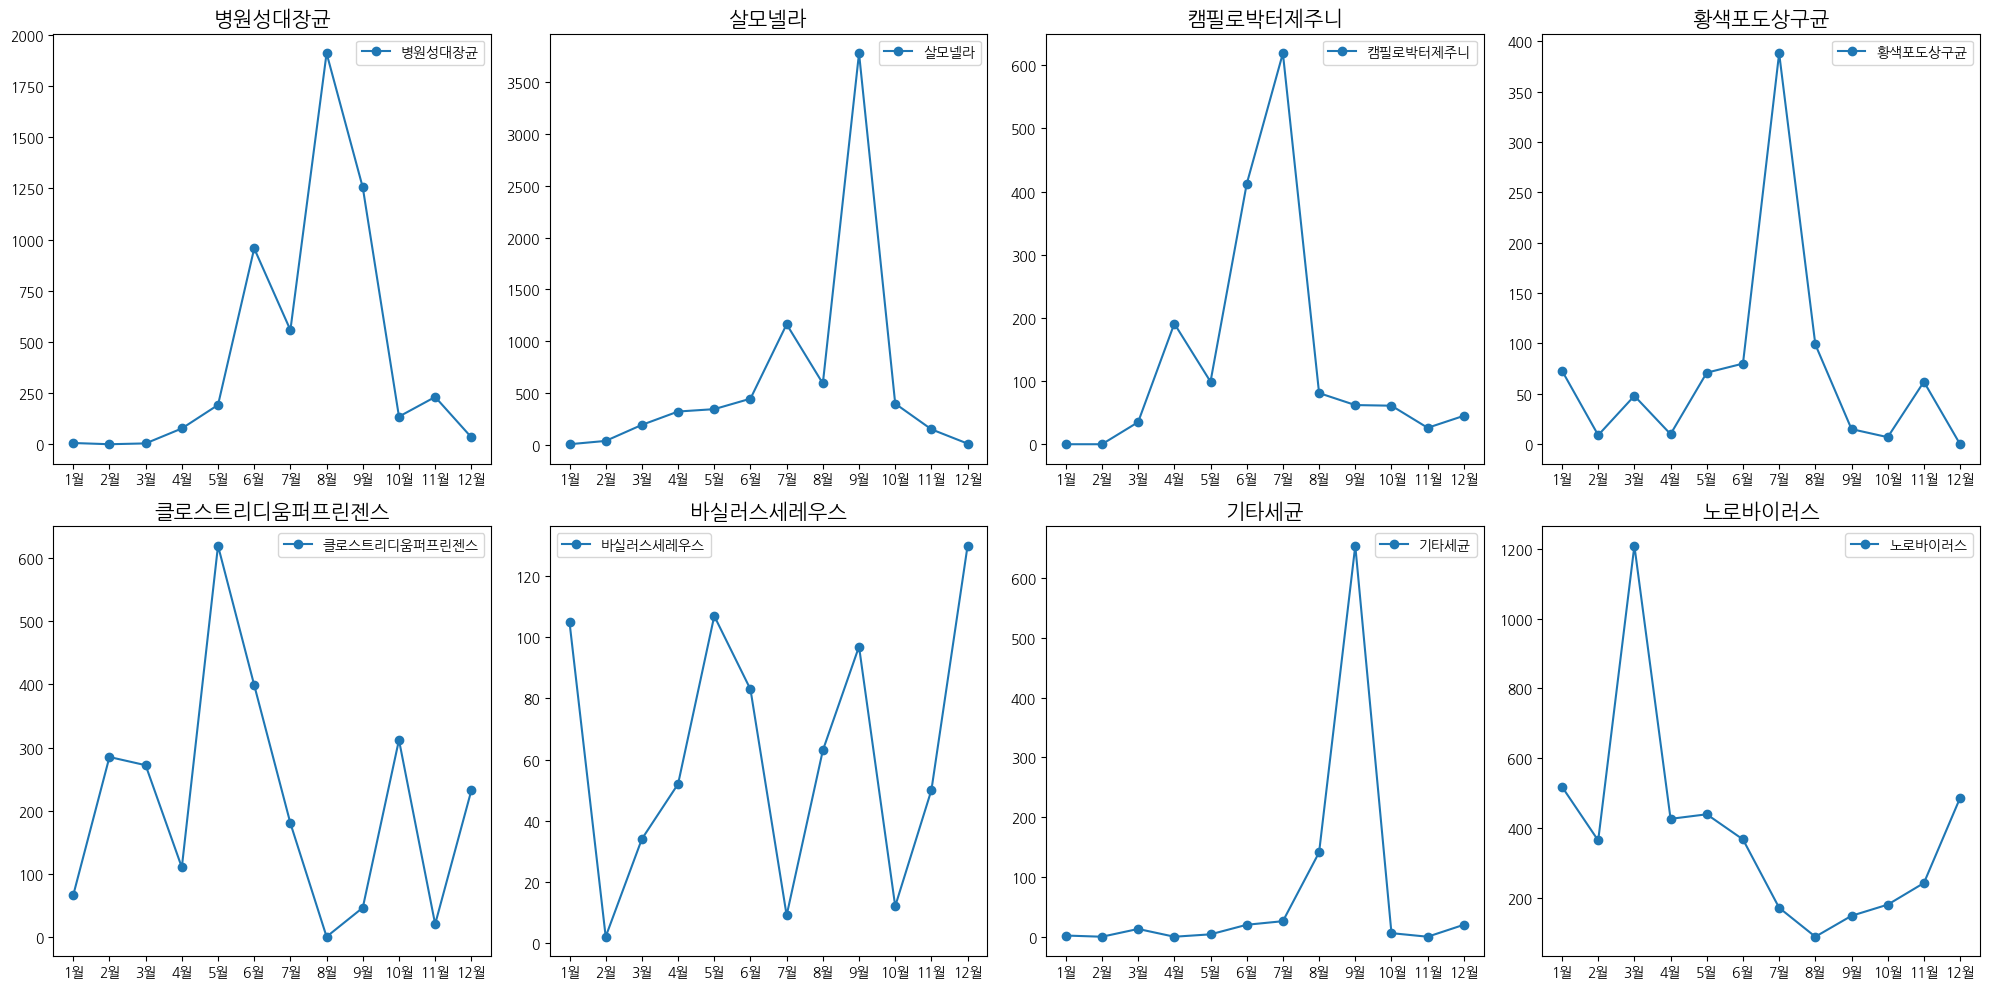

In [52]:
# 1년간 세균별 식중독 발생현황.
# 세균별 활성 온도 파악
# 병원성 대장균과 살모넬라 균의 발병 수가 압도적으로 높고 식중독 발병의 대부분을 차지하고 있음.
fig=plt.figure(figsize=(20,10))
for i in range(len(cause_list)-1):
    
    plt.subplot(2,4,i+1)
    plt.title(cause_list[i],fontsize=15)
    plt.plot(cause_month_dltcol.loc[cause_list[i]],marker='o',label=cause_list[i])
    plt.legend()
    plt.tight_layout()
plt.show()

Text(0.5, 1.0, '월별 식중독 발생 현황')

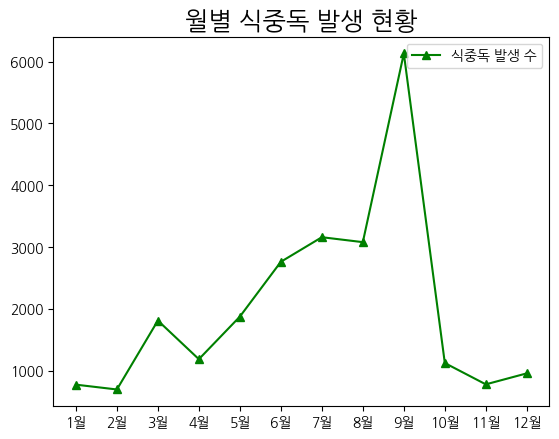

In [53]:
# 월별 식중독 발생 현황
plt.plot(cause_month_dltcol.loc['합계'],label='식중독 발생 수',marker='^',color='g')
plt.legend()
plt.title('월별 식중독 발생 현황',fontsize=18)
## 세균활성이 가장 활발한 여름 특히 6~9월이 가장 식중독 발병이 많음.

In [54]:
# 연도별 평균 기온 & 최고 기온 & 최저 기온 데이터 프레임 만들기
file_name='연도별 기온 데이터.csv'
temp_file=pd.read_csv(file_name)
temp_file.columns=['연도','평균 기온','최고 기온','최저 기온']
temp_file.set_index('연도',inplace=True)
temp_file


,평균 기온,최고 기온,최저 기온
연도,,,
2002년,12.6,37.0,-24.4
2003년,12.5,35.4,-24.6
2004년,13.2,38.5,-24.3
2005년,12.3,37.7,-23.2
2006년,12.9,38.0,-23.5
2007년,13.2,36.9,-20.0
2008년,12.9,37.7,-26.2
2009년,13.0,38.3,-20.5
2010년,12.7,37.1,-26.8


In [55]:
# 2002년부터 2022년까지 연도별 리스트 만들어주기
year_list=temp_file.index.to_list()
year_list

['2002년',
 '2003년',
 '2004년',
 '2005년',
 '2006년',
 '2007년',
 '2008년',
 '2009년',
 '2010년',
 '2011년',
 '2012년',
 '2013년',
 '2014년',
 '2015년',
 '2016년',
 '2017년',
 '2018년',
 '2019년',
 '2020년',
 '2021년',
 '2022년']

### 2002~ 2022까지 최고 기온과 최저 기온 데이터를 통하여 온도가 계속 올라가는 것을 알 수 있음.

Text(0.5, 1.0, '최고 기온')

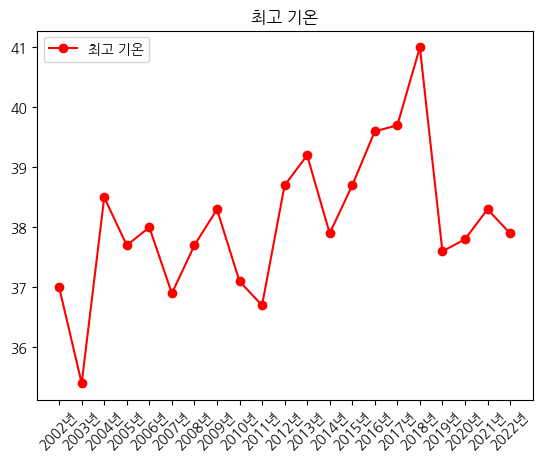

In [56]:
plt.plot(temp_file['최고 기온'],label='최고 기온',marker='o',color='r')
plt.xticks(year_list,rotation=45)
plt.legend()
plt.title('최고 기온')


Text(0.5, 1.0, '평균 기온')

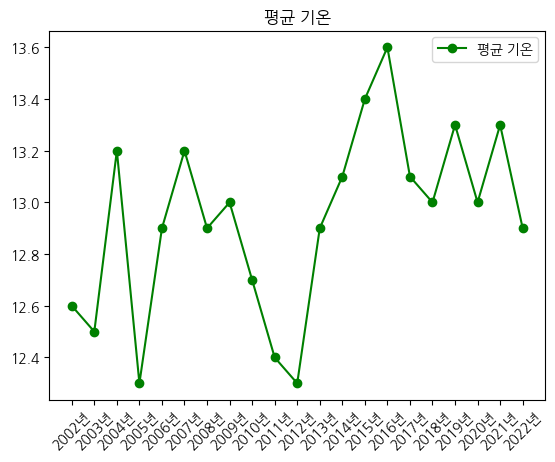

In [57]:
plt.plot(temp_file['평균 기온'],label='평균 기온',marker='o',color='g')
plt.xticks(year_list,rotation=45)
plt.legend()
plt.title('평균 기온')


In [58]:
file_name = '원인물질별_연도별_식중독_통계_.xls'
year_cause_data= pd.read_excel(file_name)
year_cause_data.set_index('원인물질',inplace=True)
year_cause_data=year_cause_data.T
year_cause_data

원인물질,병원성대장균,살모넬라
2002년,63,589
2003년,1502,416
2004년,2043,839
2005년,1883,753
2006년,2832,576
2007년,1945,1497
2008년,1278,387
2009년,1671,477
2010년,1926,677
2011년,2109,1065


In [59]:
# 최고 기온 변화에 따른 주요 식중독 균의 동향에 최고 기온 추이를 보기위해 가중치를 이용해 데이터를 표현해줌.
temp1=pd.DataFrame(temp_file['최고 기온'])
temp_scaled=temp1/temp1.max()*100
temp_scaled

,최고 기온
연도,
2002년,90.243902
2003년,86.341463
2004년,93.902439
2005년,91.951220
2006년,92.682927
2007년,90.000000
2008년,91.951220
2009년,93.414634
2010년,90.487805


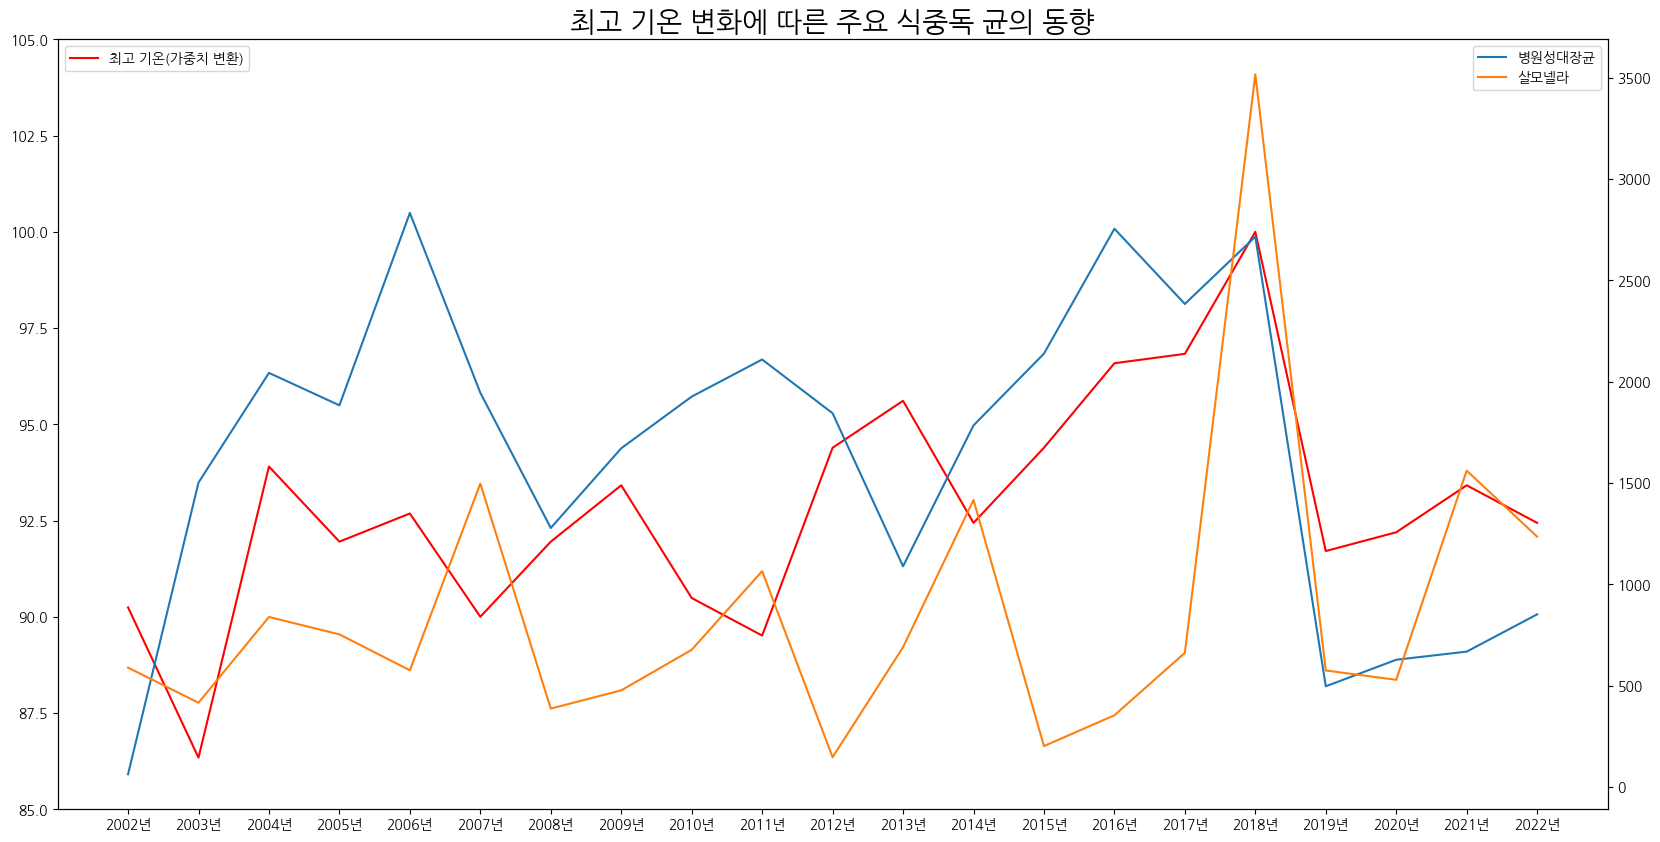

In [60]:
fig, ax1 = plt.subplots(figsize=(20,10))

new_year_list=year_list[::5]
new_year_list
x = year_list
y1 = year_cause_data
y2 = temp_scaled
ax2 = ax1.twinx()
ax2.plot(x,y1,label=['병원성대장균','살모넬라'])
ax1.plot(x,y2,'r',label='최고 기온(가중치 변환)')
ax1.legend(loc=2)
ax2.legend()
ax1.set_ylim(85,105)


plt.title('최고 기온 변화에 따른 주요 식중독 균의 동향',fontsize=20)
plt.show()
